> 해당 강의노트는 전북대학교 최규빈교수님 [STBDA2022](https://guebin.github.io/STBDA2022/) 자료임

### imports

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt

In [4]:
%load_ext tensorboard

### 오버피팅

#### 오버피팅으로 착각하기 쉬운 상황

`3-(1)` 아래와 같은 모형을 고려하자.

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자.

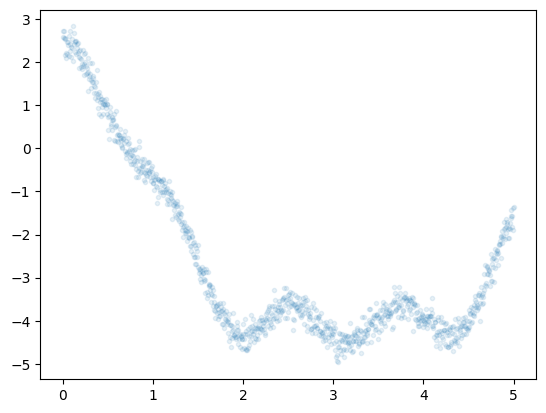

In [6]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다)

**(풀이)**

`-` 다시 풀어보자

In [7]:
y = y.reshape(1000,1)
x1 = np.cos(t)
x2 = np.cos(2*t)
x3 = np.cos(3*t)
x4 = np.cos(4*t)
x5 = np.cos(5*t)
X = tf.stack([x1,x2,x3,x4,x5],axis=1)

In [8]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.45, callbacks=tf.keras.callbacks.TensorBoard())
# 텐서보드를 이용한 시각화기능 추가
# validation_split 이용

Epoch 1/500
6/6 [==============================] - 0s 15ms/step - loss: 10.0487 - val_loss: 15.8383
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 9.9808 - val_loss: 15.7613
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 9.9136 - val_loss: 15.6839
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 9.8457 - val_loss: 15.6076
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 9.7800 - val_loss: 15.5323
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 9.7149 - val_loss: 15.4564
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 9.6470 - val_loss: 15.3823
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 9.5832 - val_loss: 15.3080
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 9.5175 - val_loss: 15.2351
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 9.4528 - val_loss: 15.1618
Epoch 11/500
6/6 

`-` 결과시각화

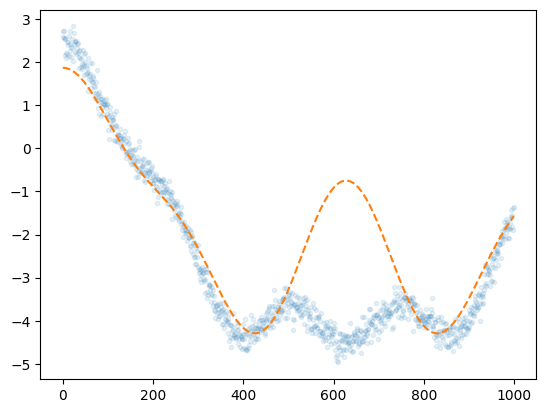

In [9]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

`-` 보여준 데이터에서는 잘 맞추는것 같지만 validation에서는 엉망이다. -> 오버피팅인가? -> 텐서보드로 확인

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

- 확인결과: 에폭마다 val_loss 가 줄어들고 있기는 하다 (늦게 줄어들뿐) -> 오버피팅이라기보다 val_set에 들어있는 자료를 예측하기에는 보여준 데이터가 불충분하다라고 해석하는것이 더 옳음 (모형자체의 문제는 아님)

`-` 해결하는 방법? 그냥 더 학습시키면된다.

In [ ]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=2000,batch_size=100, validation_split=0.45, callbacks=tf.keras.callbacks.TensorBoard())
# 텐서보드를 이용한 시각화기능 추가
# validation_split 이용

Epoch 1/2000
6/6 [==============================] - 0s 9ms/step - loss: 7.9563 - val_loss: 17.0027
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 7.9013 - val_loss: 16.9412
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.8463 - val_loss: 16.8810
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.7913 - val_loss: 16.8207
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.7380 - val_loss: 16.7617
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.6829 - val_loss: 16.7032
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.6308 - val_loss: 16.6446
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.5769 - val_loss: 16.5886
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.5245 - val_loss: 16.5321
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.4717 - val_loss: 16.4760
Epoch 11/

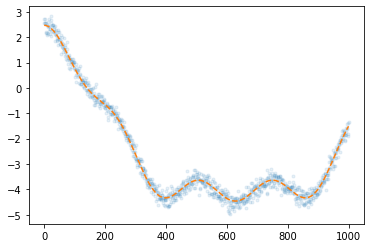

In [ ]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

- 이런것은 오버핏이 아님!

`-` 결론적으로 말해서 위와 같은 net는 설계하였을 경우 val을 빼는 것은 어리석음. (데이터만 버리는 꼴임)

`-` 더 많은 데이터를 남겨주면 더 빨리 학습한다.

In [ ]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.1, callbacks=tf.keras.callbacks.TensorBoard())

Epoch 1/500
9/9 [==============================] - 0s 5ms/step - loss: 11.1529 - val_loss: 17.6322
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 11.0510 - val_loss: 17.4478
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 10.9482 - val_loss: 17.2670
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 10.8465 - val_loss: 17.0850
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 10.7443 - val_loss: 16.9074
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 10.6457 - val_loss: 16.7250
Epoch 7/500
9/9 [==============================] - 0s 1ms/step - loss: 10.5456 - val_loss: 16.5480
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 10.4474 - val_loss: 16.3721
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 10.3499 - val_loss: 16.1945
Epoch 10/500
9/9 [==============================] - 0s 2ms/step - loss: 10.2516 - val_loss: 16.0212
Epoch 11/

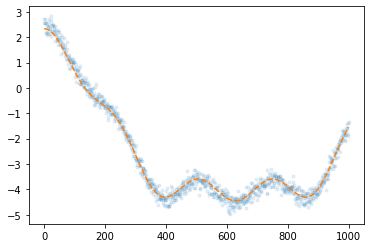

In [ ]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

#### 텐서보드: 적합결과 시각화

`-` 시각화결과는 모두 텐서보드에서 보고 싶다! 적합결과를 보여주는 fig 오브젝트를 텐서보드에 끼워넣어서 출력하는 방법을 알아보자.

In [ ]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.1, callbacks=tf.keras.callbacks.TensorBoard())

Epoch 1/500
9/9 [==============================] - 0s 5ms/step - loss: 11.9832 - val_loss: 10.8663
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 11.8783 - val_loss: 10.7961
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 11.7750 - val_loss: 10.7292
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 11.6712 - val_loss: 10.6628
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 11.5688 - val_loss: 10.5916
Epoch 6/500
9/9 [==============================] - 0s 1ms/step - loss: 11.4671 - val_loss: 10.5235
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 11.3650 - val_loss: 10.4527
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 11.2672 - val_loss: 10.3818
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 11.1664 - val_loss: 10.3141
Epoch 10/500
9/9 [==============================] - 0s 2ms/step - loss: 11.0684 - val_loss: 10.2464
Epoch 11/

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

`-` 끼워넣을 오브젝트 만들기

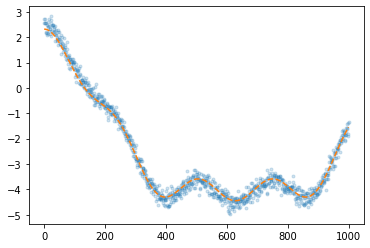

In [ ]:
fig, ax = plt.subplots()
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')

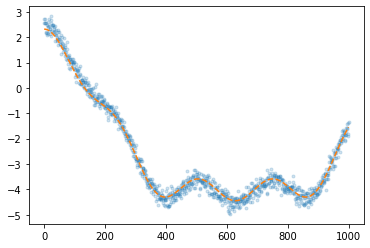

In [ ]:
fig

`-` 이제 fig 오브젝트를 끼워넣을 코드를 구성하자. (공식홈페이지 참고)

- https://www.tensorflow.org/tensorboard/image_summaries

In [ ]:
# 이코드는 한번만 실행
#from datetime import datetime
import io
logdir = "logs"
#logdir = "logs" + datetime.now().strftime("%Y%m%d-%H%M%S")

def plot_to_image(fig): # 사용자가 지정한 그림오브젝트 fig를 넣으면 텐서보드에 끼워넣을수 있는 형태로 출력해주는 함수
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(fig)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

In [ ]:
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

### 학습과정분석

#### 텐서보드: 가중치 시각화

`-` 에폭별로 가중치가 수렴하는 모양을 보고 싶다.

`3-(1)` 아래와 같은 모형을 고려하자.

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자.

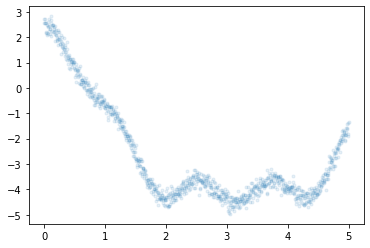

In [ ]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

`-` 학습을 진행하면서 가중치가 어떻게 업데이트 되는지 시각화하자.

In [ ]:
# y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2

In [ ]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=cb1)

Epoch 1/2000
6/6 [==============================] - 0s 10ms/step - loss: 10.5761 - val_loss: 13.6319
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.5050 - val_loss: 13.5579
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.4352 - val_loss: 13.4839
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.3643 - val_loss: 13.4108
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.2954 - val_loss: 13.3387
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 10.2266 - val_loss: 13.2667
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.1574 - val_loss: 13.1948
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.0893 - val_loss: 13.1239
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 10.0220 - val_loss: 13.0539
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 9.9545 - val_loss: 12.9839

In [ ]:
net.weights

[<tf.Variable 'dense_9/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 2.9966218e+00],
        [ 1.0097879e+00],
        [-1.4235497e-02],
        [ 3.8510602e-04],
        [ 4.8625717e-01]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([-2.0080342], dtype=float32)>]

In [ ]:
net.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

#### 텐서보드: 사용자지정그림 에폭별로 시각화 (1)

`-` 100에폭마다 적합결과를 시각화 하고 싶다 + 가중치와 같이!!
- https://www.tensorflow.org/guide/keras/custom_callback

`-` 일단 "100에폭마다 가중치적합과정 시각화 + 최종적합곡선 시각화" 까지 구현

In [ ]:
#collapse_output
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=cb1)

Epoch 1/2000
6/6 [==============================] - 0s 11ms/step - loss: 6.6990 - val_loss: 14.1016
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 6.6442 - val_loss: 14.0394
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.5913 - val_loss: 13.9775
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.5361 - val_loss: 13.9172
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.4823 - val_loss: 13.8573
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.4314 - val_loss: 13.7958
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.3769 - val_loss: 13.7367
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.3262 - val_loss: 13.6770
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.2734 - val_loss: 13.6171
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.2212 - val_loss: 13.5591
Epoch 11

In [ ]:
fig, ax = plt.subplots()
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

`-` 아래의 코드를 100에폭마다 실행하고 싶다.

```python
fig, ax = plt.subplots()
ax.plot(y,'.',alpha=0.2)
ax.plot(net(X),'--')
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("적합결과시각화", plot_to_image(fig), step=0)
```

`-` 일단 net.fit직전까지의 코드를 구현

In [ ]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')

`-` 사용자정의 콜백클래스를 만듬

In [ ]:
class PlotYhat(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs): # 입력은 무조건 self, epoch, logs를 써야합니다 --> 이 함수안에 에폭이 끝날때마다 할 동작을 정의한다.
        if epoch % 100 ==0:
            fig, ax = plt.subplots()
            ax.plot(y,'.',alpha=0.2)
            ax.plot(net(X),'--')
            with tf.summary.create_file_writer(logdir).as_default():
                tf.summary.image("적합결과시각화"+str(epoch), plot_to_image(fig), step=0)

`-` 내가 만든 클래스에서 cb2를 생성

In [ ]:
#collapse_output
!rm -rf logs
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
cb2= PlotYhat()
net.fit(X,y,epochs=2000, batch_size=100, validation_split=0.45,callbacks=[cb1,cb2])

Epoch 1/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.8708 - val_loss: 9.1608
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.8444 - val_loss: 9.1250
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.8186 - val_loss: 9.0901
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.7930 - val_loss: 9.0545
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.7673 - val_loss: 9.0188
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.7417 - val_loss: 8.9828
Epoch 7/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.7169 - val_loss: 8.9476
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.6913 - val_loss: 8.9134
Epoch 9/2000
6/6 [==============================] - 0s 4ms/step - loss: 2.6667 - val_loss: 8.8786
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 2.6420 - val_loss: 8.8450
Epoch 11/2000
6/6 [

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

#### 텐서보드: 사용자지정그림 에폭별로 시각화 (2)

`-` 중간층의 출력결과를 시각화하고 싶다.

`4`. Piecewise-linear regression (15점)

아래의 모형을 고려하자.

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$

아래는 위의 모형에서 생성한 샘플이다.

In [ ]:
## data
np.random.seed(43052)
N=100
x= np.linspace(-1,1,N).reshape(N,1)
y= np.array(list(map(lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5+np.random.normal()*0.3,x))).reshape(N,1)

(풀이)

In [ ]:
tf.random.set_seed(43055)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2))
net.add(tf.keras.layers.Activation(tf.nn.relu))
net.add(tf.keras.layers.Dense(1))
net.compile(optimizer='sgd',loss='mse')
net.fit(x,y,epochs=1,batch_size=100)

1/1 [==============================] - 0s 79ms/step - loss: 2.1414


In [ ]:
l1,a1,l2 =net.layers

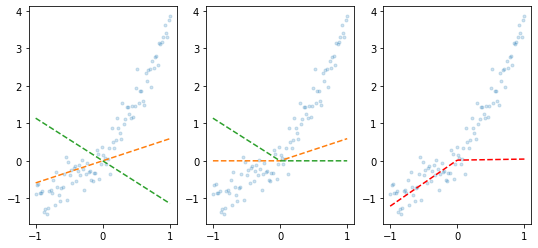

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figwidth(9)
ax1.plot(x,y,'.',alpha=0.2); ax1.plot(x,l1(x),'--');
ax2.plot(x,y,'.',alpha=0.2); ax2.plot(x,a1(l1(x)),'--');
ax3.plot(x,y,'.',alpha=0.2); ax3.plot(x,l2(a1(l1(x))),'--r');

- 이런 그림이 100에폭마다 그려졌으면 좋겠다.

`-` 새로운 클래스를 만들자.

In [ ]:
class PlotMidlayer(tf.keras.callbacks.Callback):
    def on_epoch_begin(self,epoch,logs): # 입력은 무조건 self, epoch, logs를 써야합니다 --> 이 함수안에 에폭이 끝날때마다 할 동작을 정의한다.
        if epoch % 100 ==0:
            fig, (ax1,ax2,ax3) = plt.subplots(1,3)
            fig.set_figwidth(9)
            ax1.plot(x,y,'.',alpha=0.2); ax1.plot(x,l1(x),'--');
            ax2.plot(x,y,'.',alpha=0.2); ax2.plot(x,a1(l1(x)),'--');
            ax3.plot(x,y,'.',alpha=0.2); ax3.plot(x,l2(a1(l1(x))),'--r');
            with tf.summary.create_file_writer(logdir).as_default():
                tf.summary.image("적합결과시각화"+str(epoch), plot_to_image(fig), step=0)

In [ ]:
!rm -rf logs
cb1= tf.keras.callbacks.TensorBoard(update_freq='epoch',histogram_freq=100)
cb2= PlotMidlayer()
net.fit(x,y,epochs=1000, batch_size=100,verbose=0 ,callbacks=[cb1,cb2])

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0